Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [34]:
pip install Augmentor
pip install tensorflow
pip install opencv-python

  Using cached Augmentor-0.2.10-py2.py3-none-any.whl (38 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import Augmentor

Note: you may need to restart the kernel to use updated packages.


In [3]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Train")
data_dir_test = pathlib.Path('/Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Test')


In [5]:
data_dir_test

PosixPath('/Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
size_of_batch = 32
image_height = 180
image_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size image_height*image_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split = 0.2,
    subset = 'training',
    image_size = (image_height,image_width),
    batch_size = size_of_batch
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


2022-10-17 08:29:08.483618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size image_height*image_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split = 0.2,
    subset = 'validation',
    image_size = (image_height,image_width),
    batch_size = size_of_batch
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

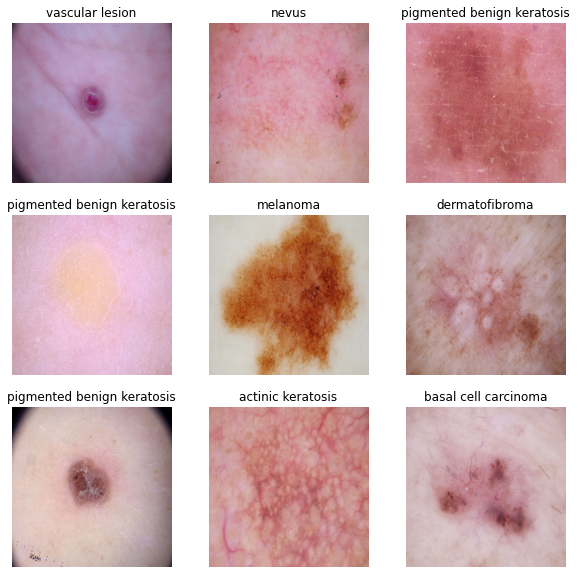

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

### Create the model
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here

num_classes = 9

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (image_height, image_width, 3)),
    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
    
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/20
56/56 [==============================] - 23s 329ms/step - loss: 1.8896 - accuracy: 0.3170 - val_loss: 1.7385 - val_accuracy: 0.3803
Epoch 2/20
56/56 [==============================] - 16s 289ms/step - loss: 1.6264 - accuracy: 0.4353 - val_loss: 1.4735 - val_accuracy: 0.5123
Epoch 3/20
56/56 [==============================] - 16s 284ms/step - loss: 1.4529 - accuracy: 0.4816 - val_loss: 1.3966 - val_accuracy: 0.5213
Epoch 4/20
56/56 [==============================] - 16s 282ms/step - loss: 1.3507 - accuracy: 0.5162 - val_loss: 1.6363 - val_accuracy: 0.4832
Epoch 5/20
56/56 [==============================] - 16s 282ms/step - loss: 1.2604 - accuracy: 0.5631 - val_loss: 1.3830 - val_accuracy: 0.5324
Epoch 6/20
56/56 [==============================] - 16s 282ms/step - loss: 1.1320 - accuracy: 0.5938 - val_loss: 1.2966 - val_accuracy: 0.5391
Epoch 7/20
56/56 [==============================] - 16s 285ms/step - loss: 1.0578 - accuracy: 0.6267 - val_loss: 1.4660 - val_accuracy: 0.4877

### Visualizing training results

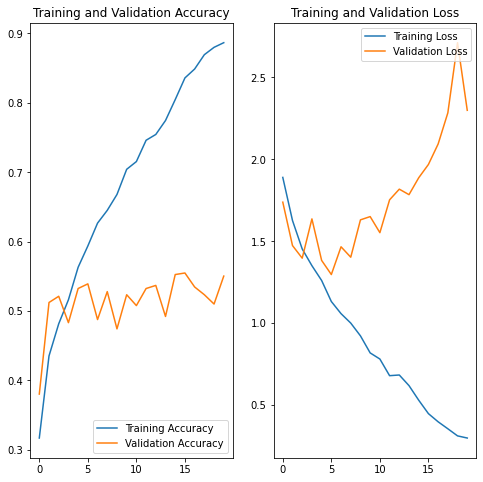

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (image_height,image_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

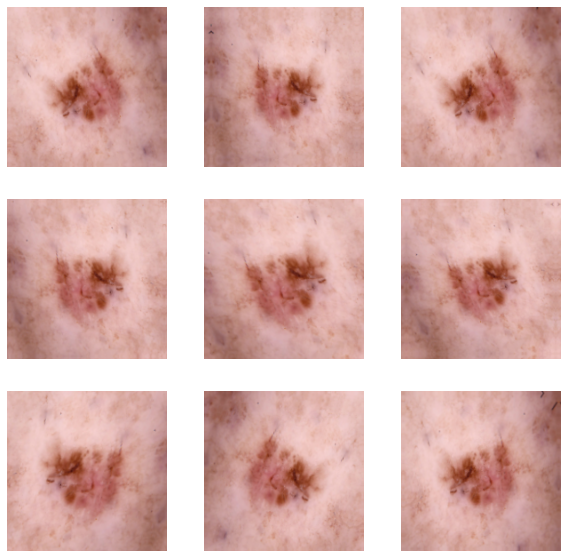

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [20]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

### Compiling the model

In [21]:
## Your code goes here
model.compile(optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
metrics = ['accuracy'])

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/20
56/56 [==============================] - 22s 355ms/step - loss: 2.0638 - accuracy: 0.2271 - val_loss: 1.9369 - val_accuracy: 0.2886
Epoch 2/20
56/56 [==============================] - 21s 380ms/step - loss: 1.8224 - accuracy: 0.3320 - val_loss: 1.6515 - val_accuracy: 0.4273
Epoch 3/20
56/56 [==============================] - 21s 379ms/step - loss: 1.6381 - accuracy: 0.4129 - val_loss: 1.5557 - val_accuracy: 0.4653
Epoch 4/20
56/56 [==============================] - 21s 382ms/step - loss: 1.4630 - accuracy: 0.4911 - val_loss: 1.4667 - val_accuracy: 0.5280
Epoch 5/20
56/56 [==============================] - 21s 380ms/step - loss: 1.4049 - accuracy: 0.4989 - val_loss: 1.5406 - val_accuracy: 0.4653
Epoch 6/20
56/56 [==============================] - 22s 395ms/step - loss: 1.3482 - accuracy: 0.5240 - val_loss: 1.3593 - val_accuracy: 0.5436
Epoch 7/20
56/56 [==============================] - 21s 382ms/step - loss: 1.2743 - accuracy: 0.5513 - val_loss: 1.3900 - val_accuracy: 0.4944

### Visualizing the results

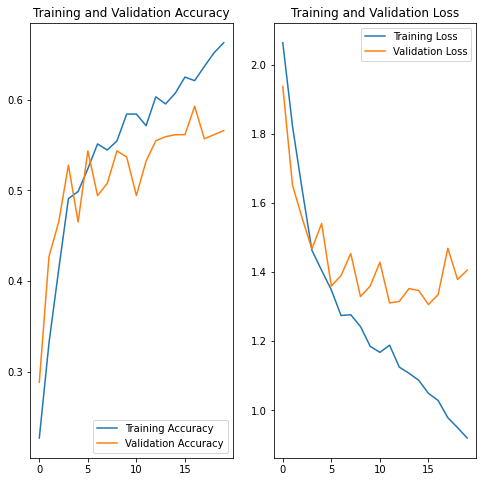

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(len(lesion_list))

2239


In [25]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('/Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Train/melanoma/ISIC_0010550.jpg', 'melanoma'), ('/Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Train/melanoma/ISIC_0011128.jpg', 'melanoma')]


In [26]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns = ['Path','Label'])
original_df.head()

,Path,Label
0,/Users/in-hmanish/Workspace/upgradDataScience/...,melanoma
1,/Users/in-hmanish/Workspace/upgradDataScience/...,melanoma
2,/Users/in-hmanish/Workspace/upgradDataScience/...,melanoma
3,/Users/in-hmanish/Workspace/upgradDataScience/...,melanoma
4,/Users/in-hmanish/Workspace/upgradDataScience/...,melanoma


In [27]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns = ['Path','Label'])
original_df.head()

,Path,Label
0,/Users/in-hmanish/Workspace/upgradDataScience/...,melanoma
1,/Users/in-hmanish/Workspace/upgradDataScience/...,melanoma
2,/Users/in-hmanish/Workspace/upgradDataScience/...,melanoma
3,/Users/in-hmanish/Workspace/upgradDataScience/...,melanoma
4,/Users/in-hmanish/Workspace/upgradDataScience/...,melanoma


In [28]:
original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

In [29]:
original_df[['Label']].value_counts(normalize=True)

Label                     
pigmented benign keratosis    0.206342
melanoma                      0.195623
basal cell carcinoma          0.167932
nevus                         0.159446
squamous cell carcinoma       0.080840
vascular lesion               0.062081
actinic keratosis             0.050916
dermatofibroma                0.042430
seborrheic keratosis          0.034390
dtype: float64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [30]:
!pip install Augmentor

  Using cached future-0.18.2.tar.gz (829 kB)
     |████████████████████████████████| 78 kB 12.9 MB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=a95c69fa6d2e2a24dd1c7c0fc1bf3e4d71459aac6c7b898bd8ab51094e581372
  Stored in directory: /Users/in-hmanish/Library/Caches/pip/wheels/2f/a0/d3/4030d9f80e6b3be787f19fc911b8e7aa462986a40ab1e4bb94
Successfully built future


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [38]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability = 0.7, max_left_rotation = 10, max_right_rotation = 10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x15CA86A60>: 100%|███████████████████████████████| 500/500 [00:03<00:00, 125.60 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x132842BE0>: 100%|███████████████████████████████| 500/500 [00:03<00:00, 129.99 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x132865880>: 100%|███████████████████████████████| 500/500 [00:04<00:00, 123.08 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x15CEAF7F0>: 100%|████████████████████████████████| 500/500 [00:27<00:00, 18.20 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x13299B4F0>: 100%|████████████████████████████████████████████████| 500/500 [00:22<00:00, 22.23 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x131B6FBE0>: 100%|█████████████████████████████████████████████████| 500/500 [00:04<00:00, 122.27 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1329681C0>: 100%|█████████████████████████████████████████████████| 500/500 [00:09<00:00, 52.67 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15CDC4130>: 100%|█████████████████████████████████████████████████| 500/500 [00:03<00:00, 130.68 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1328594F0>: 100%|█████████████████████████████████████████████████| 500/500 [00:03<00:00, 127.61 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [39]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [40]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:2]

['/Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011163.jpg_cb415a3a-7281-483e-abb0-52d2561a61e5.jpg',
 '/Users/in-hmanish/Workspace/upgradDataScience/deeplearning/melnomaAssignment/Skin_cancer_ISIC_The_International_Skin Imaging_Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010189.jpg_4f042616-8d41-45fa-852a-364332d1ad1f.jpg']

In [41]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:2]

['melanoma', 'melanoma']

In [42]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [43]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
new_df.shape

(11239, 2)

In [48]:
from cv2 import normalize


new_df['Label'].value_counts(normalize = True)

pigmented benign keratosis    0.130083
melanoma                      0.127947
basal cell carcinoma          0.122431
nevus                         0.120740
squamous cell carcinoma       0.105081
vascular lesion               0.101344
actinic keratosis             0.099119
dermatofibroma                0.097429
seborrheic keratosis          0.095827
Name: Label, dtype: float64

In [49]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [50]:
size_of_batch = 32
image_height = 180
image_width = 180

#### **Todo:** Create a training dataset

In [51]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed = 123,
  validation_split = 0.2,
  subset = 'training',
  image_size = (image_height, image_width),
  batch_size =  size_of_batch)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [52]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed = 123,
  validation_split = 0.2,
  subset = 'validation',
  image_size = (image_height, image_width),
  batch_size = size_of_batch)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [53]:
## your code goes here
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [54]:
## your code goes here
model.compile(optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
metrics = ['accuracy'])

#### **Todo:**  Train your model

In [55]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/30
281/281 [==============================] - 147s 508ms/step - loss: 1.7530 - accuracy: 0.3214 - val_loss: 1.5117 - val_accuracy: 0.4108
Epoch 2/30
281/281 [==============================] - 165s 584ms/step - loss: 1.3973 - accuracy: 0.4603 - val_loss: 1.4318 - val_accuracy: 0.4726
Epoch 3/30
281/281 [==============================] - 167s 590ms/step - loss: 1.2517 - accuracy: 0.5212 - val_loss: 1.5084 - val_accuracy: 0.4370
Epoch 4/30
281/281 [==============================] - 185s 657ms/step - loss: 1.1748 - accuracy: 0.5506 - val_loss: 1.3455 - val_accuracy: 0.4976
Epoch 5/30
281/281 [==============================] - 189s 668ms/step - loss: 1.0728 - accuracy: 0.5949 - val_loss: 1.3478 - val_accuracy: 0.5038
Epoch 6/30
281/281 [==============================] - 207s 731ms/step - loss: 0.9973 - accuracy: 0.6243 - val_loss: 1.4554 - val_accuracy: 0.4984
Epoch 7/30
281/281 [==============================] - 201s 714ms/step - loss: 0.9135 - accuracy: 0.6566 - val_loss: 1.3727 -

#### **Todo:**  Visualize the model results

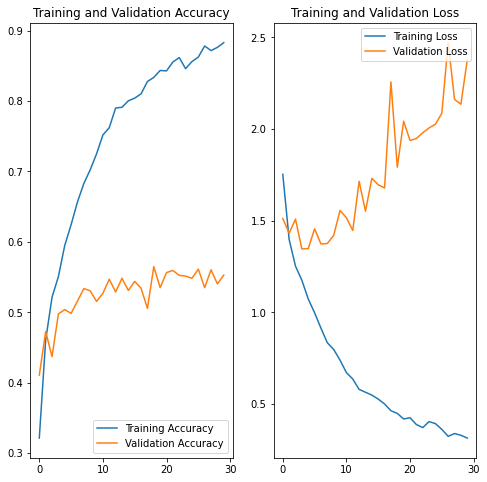

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
* model performance improved on Training and Validation  by Class rebalanced
* no sign of underfitting and Overfitting
* low difference between traiing and validation accuracy, with epochs 30

